In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('PR accession data_2016_22.xlsx', sheet_name='2018')
df.head()

,Year,Archon Code,Repository Name,Region,Creator,Description,Covering Dates,Type Public Record,Total linear meter accessioned,Payment per linear meter,Total Payment
0,2018,4,Bedfordshire Archives & Records Service,East of England,"Fairfield Hospital, Stotfold (Bedford & Luton ...",NaN,nd-1985,NHS,1.000,604.59,NaN
1,2018,4,Bedfordshire Archives & Records Service,East of England,Steppingley Hospital Records,NaN,1913-1990s,NHS,1.000,604.59,NaN
2,2018,5,Berkshire Record Office,South East England,Broadmoor Hospital,NaN,1960s,NHS,8.304,604.59,NaN
3,2018,5,Berkshire Record Office,South East England,Forest Petty Sessions,NaN,1949-1997,magistrates,0.696,604.59,NaN
4,2018,5,Berkshire Record Office,South East England,Hungerford and Lambourn Petty Sessions,NaN,1961-1983,magistrates,0.012,604.59,NaN


In [4]:
df1 = pd.concat(pd.read_excel('PR accession data_2016_22.xlsx', converters={'Archon Code':int, 'Year':str}, sheet_name=None), ignore_index=True)
df.head()
#df.tail()

,Year,Archon Code,Repository Name,Region,Creator,Description,Covering Dates,Type Public Record,Total linear meter accessioned,Payment per linear meter,Total Payment
0,2018,4,Bedfordshire Archives & Records Service,East of England,"Fairfield Hospital, Stotfold (Bedford & Luton ...",NaN,nd-1985,NHS,1.000,604.59,NaN
1,2018,4,Bedfordshire Archives & Records Service,East of England,Steppingley Hospital Records,NaN,1913-1990s,NHS,1.000,604.59,NaN
2,2018,5,Berkshire Record Office,South East England,Broadmoor Hospital,NaN,1960s,NHS,8.304,604.59,NaN
3,2018,5,Berkshire Record Office,South East England,Forest Petty Sessions,NaN,1949-1997,magistrates,0.696,604.59,NaN
4,2018,5,Berkshire Record Office,South East England,Hungerford and Lambourn Petty Sessions,NaN,1961-1983,magistrates,0.012,604.59,NaN


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            1199 non-null   object 
 1   Archon Code                     1199 non-null   object 
 2   Repository Name                 1200 non-null   object 
 3   Region                          1199 non-null   object 
 4   Creator                         1197 non-null   object 
 5   Description                     641 non-null    object 
 6   Covering Dates                  1194 non-null   object 
 7   Type Public Record              1199 non-null   object 
 8   Total linear meter accessioned  1199 non-null   float64
 9   Payment per linear meter        1199 non-null   float64
 10  Total Payment                   502 non-null    float64
dtypes: float64(3), object(8)
memory usage: 103.7+ KB


In [6]:
df1[df1['Year'].isna()]

,Year,Archon Code,Repository Name,Region,Creator,Description,Covering Dates,Type Public Record,Total linear meter accessioned,Payment per linear meter,Total Payment
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.48,NaN,NaN
1061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1065,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df1 = df1.dropna(subset=['Year'])

In [8]:
df1.shape

(1199, 11)

In [9]:
df1['Archon Code'] = df1['Archon Code'].astype(int)

In [10]:
df1['Year'] = pd.to_datetime(df1['Year'])
df1['Year'] = pd.DatetimeIndex(df1['Year']).year
df1.head()

,Year,Archon Code,Repository Name,Region,Creator,Description,Covering Dates,Type Public Record,Total linear meter accessioned,Payment per linear meter,Total Payment
0,2022,1,Bath Record Office,South West England,Royal United Hospital / RUH NHS Trust / RNHRD ...,"Board and committee minutes, probationers nurs...",1919-2002,NHS,4.00,675.21,2700.84
1,2022,1,Bath Record Office,South West England,Wansdyke Petty Sessions court / Bath & Wansdyk...,Registers of court including adult and juvenil...,1967-2002,magistrates,45.00,675.21,30384.45
2,2022,2,Bristol Archives,South West England,Ham Green Hospital,Volumes of admissions and discharges,1950 - 1954,NHS,0.76,675.21,513.16
3,2022,2,Bristol Archives,South West England,Ham Green Hospital,Patient registers,1949 - 1954,NHS,1.31,675.21,884.53
4,2022,4,Bedfordshire Archives,East of England,Bedfordshire and Luton Coroner Service,Inquest case files,2002-2007,coroner,1.90,675.21,1282.90


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            1199 non-null   int64  
 1   Archon Code                     1199 non-null   int64  
 2   Repository Name                 1199 non-null   object 
 3   Region                          1199 non-null   object 
 4   Creator                         1197 non-null   object 
 5   Description                     641 non-null    object 
 6   Covering Dates                  1194 non-null   object 
 7   Type Public Record              1199 non-null   object 
 8   Total linear meter accessioned  1198 non-null   float64
 9   Payment per linear meter        1199 non-null   float64
 10  Total Payment                   502 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 112.4+ KB


In [12]:
df2 = pd.read_excel('ArchonExtract v2.xlsx')
df2.head()

,Archon Code,RepositoryName,type,PitchID,pitchName,PROApproval
0,1,Bath Record Office,Local,25298.0,South West England,yes
1,2,Bristol Archives,Local,25298.0,South West England,yes
2,3,Bristol University Information Services: Speci...,University,25298.0,South West England,no
3,4,Bedfordshire Archives & Records Service,Local,25277.0,East of England,yes
4,5,Berkshire Record Office,Local,25297.0,South East England,yes


In [13]:
df = df1.merge(df2[['Archon Code','RepositoryName']], on='Archon Code', how='left')
df.tail(10)


,Year,Archon Code,Repository Name,Region,Creator,Description,Covering Dates,Type Public Record,Total linear meter accessioned,Payment per linear meter,Total Payment,RepositoryName
1189,2015,214,Glamorgan Archives (formerly Glamorgan Record ...,Wales,Abercynon Magistrates Court,Court registers,1970-1979,magistrates,0.360,603.21,NaN,Glamorgan Archives
1190,2015,214,Glamorgan Archives (formerly Glamorgan Record ...,Wales,Mountain Ash Magistrates Court,Court registers,1969-1979,magistrates,0.720,603.21,NaN,Glamorgan Archives
1191,2015,214,Glamorgan Archives (formerly Glamorgan Record ...,Wales,Miskin Higher Petty Sessional Division,Court registers (including juvenile),1963-1970,magistrates,0.960,603.21,NaN,Glamorgan Archives
1192,2015,214,Glamorgan Archives (formerly Glamorgan Record ...,Wales,Aberdare/Cynon Valley Magistrates Court,Court registers (including juvenile and matrim...,c1971-2006,magistrates,5.520,603.21,NaN,Glamorgan Archives
1193,2015,218,Gwent Archives,Wales,Monmouth General Hospital,"Plans of new hospital, Monmouth (1901); buildi...","1869, c1900-1947",NHS,NaN,603.21,NaN,Gwent Archives
1194,2015,757,Berwick-upon-Tweed Record Office,North East England,Berwick and Wooler Magistrates Court,Registers,1979-1985,magistrates,1.829,603.21,NaN,Berwick-upon-Tweed Record Office
1195,2015,758,Oldham Local Studies & Archives,North West England,Oldham Workhouse,"Lunatic examination register, 1925-1937, Regis...",1890-1954,NHS,0.030,603.21,NaN,Oldham Local Studies & Archives
1196,2015,1076,Knowsley Archives,North West England,St Helen's Magistrates Court,"Adult, youth and licensing registers for Knows...",1994-2005,magistrates,14.650,603.21,NaN,ARK: Archive Resource for Knowsley
1197,2015,1189,Peterborough Archives,East of England,HM Coroner Peterborough,Inquest and Natural Causes Files,1984-1999,coroner,7.000,603.21,NaN,Peterborough Archives
1198,2015,1831,"Cumbria Archive and Local Studies Centre, Whit...",North West England,HM Coroner West Cumbria,Inquest case files,1997-1999,coroner,2.592,603.21,NaN,"Cumbria Archive and Local Studies Centre, Whit..."


In [14]:
df.shape

(1199, 12)

In [15]:
df.drop(['Repository Name'], axis=1, inplace=True)
#df.drop(['Repository'], axis=1, inplace=True)

In [16]:
df.insert(2, 'RepositoryName', df.pop('RepositoryName'))
# sorting columns
df.head(2)

,Year,Archon Code,RepositoryName,Region,Creator,Description,Covering Dates,Type Public Record,Total linear meter accessioned,Payment per linear meter,Total Payment
0,2022,1,Bath Record Office,South West England,Royal United Hospital / RUH NHS Trust / RNHRD ...,"Board and committee minutes, probationers nurs...",1919-2002,NHS,4.0,675.21,2700.84
1,2022,1,Bath Record Office,South West England,Wansdyke Petty Sessions court / Bath & Wansdyk...,Registers of court including adult and juvenil...,1967-2002,magistrates,45.0,675.21,30384.45


In [17]:
df['Total Payment'] = (df['Total linear meter accessioned'] * df['Payment per linear meter']).round(decimals=2)
df.tail()

,Year,Archon Code,RepositoryName,Region,Creator,Description,Covering Dates,Type Public Record,Total linear meter accessioned,Payment per linear meter,Total Payment
1194,2015,757,Berwick-upon-Tweed Record Office,North East England,Berwick and Wooler Magistrates Court,Registers,1979-1985,magistrates,1.829,603.21,1103.27
1195,2015,758,Oldham Local Studies & Archives,North West England,Oldham Workhouse,"Lunatic examination register, 1925-1937, Regis...",1890-1954,NHS,0.030,603.21,18.10
1196,2015,1076,ARK: Archive Resource for Knowsley,North West England,St Helen's Magistrates Court,"Adult, youth and licensing registers for Knows...",1994-2005,magistrates,14.650,603.21,8837.03
1197,2015,1189,Peterborough Archives,East of England,HM Coroner Peterborough,Inquest and Natural Causes Files,1984-1999,coroner,7.000,603.21,4222.47
1198,2015,1831,"Cumbria Archive and Local Studies Centre, Whit...",North West England,HM Coroner West Cumbria,Inquest case files,1997-1999,coroner,2.592,603.21,1563.52


In [18]:
df.Region.value_counts()

North East England            263
South East England            211
South West England            111
North West England             89
West Midlands                  86
Wales                          85
East Midlands                  70
East of England                62
Yorkshire and the Humber       60
Yorkshire and Humberside       40
London                         36
Greater London                 30
East of England                21
Yorkshire and Humber           19
Greater Greater Londonndon     10
 East of England                6
Name: Region, dtype: int64

In [19]:
df.loc[df["Region"] == 'Yorkshire and Humberside', "Region"] = 'Yorkshire and the Humber'
df.loc[df["Region"] == 'Yorkshire and Humber', "Region"] = 'Yorkshire and the Humber'
df.loc[df["Region"] == 'Greater London', "Region"] = 'London'
df.loc[df["Region"] == 'Greater Greater Londonndon', "Region"] = 'London'
df.loc[df["Region"] == ' East of England', "Region"] = 'East of England'
df.loc[df["Region"] == 'East of England ', "Region"] = 'East of England'

In [20]:
sums = df.groupby('Region')['Archon Code'].nunique().sort_values(ascending=False)
sums

Region
North West England          17
Yorkshire and the Humber    13
West Midlands               12
East of England             11
South East England          11
Wales                       11
South West England          10
East Midlands                5
North East England           5
London                       3
Name: Archon Code, dtype: int64

In [21]:
regions = df.groupby('Region')['Archon Code'].nunique().sort_values(ascending=False)
regions = regions.to_frame('No. of archives').reset_index()
regions
# no. of archives per region

,Region,No. of archives
0,North West England,17
1,Yorkshire and the Humber,13
2,West Midlands,12
3,East of England,11
4,South East England,11
5,Wales,11
6,South West England,10
7,East Midlands,5
8,North East England,5
9,London,3


In [22]:
region_totals = df.groupby('Region')['Total linear meter accessioned','Total Payment'].sum().sort_values(by='Total Payment',ascending=False).reset_index()
region_totals
# lm and total payment per region

<ipython-input-22-e3e01fc11920>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_totals = df.groupby('Region')['Total linear meter accessioned','Total Payment'].sum().sort_values(by='Total Payment',ascending=False).reset_index()


,Region,Total linear meter accessioned,Total Payment
0,West Midlands,1623.491000,904400.83
1,South East England,1443.563400,800524.86
2,North West England,1314.112200,790715.90
3,Yorkshire and the Humber,1186.503920,729817.77
4,East Midlands,830.864000,469879.09
5,Wales,893.984000,446389.40
6,South West England,796.293432,421552.30
7,London,910.480000,380312.55
8,North East England,672.877420,349697.37
9,East of England,881.152368,289203.17


In [23]:
all_region = regions.merge(region_totals, on='Region').sort_values(by='Total Payment',ascending=False)
all_region

,Region,No. of archives,Total linear meter accessioned,Total Payment
2,West Midlands,12,1623.491000,904400.83
4,South East England,11,1443.563400,800524.86
0,North West England,17,1314.112200,790715.90
1,Yorkshire and the Humber,13,1186.503920,729817.77
7,East Midlands,5,830.864000,469879.09
5,Wales,11,893.984000,446389.40
6,South West England,10,796.293432,421552.30
9,London,3,910.480000,380312.55
8,North East England,5,672.877420,349697.37
3,East of England,11,881.152368,289203.17


In [24]:
df.groupby('Region').agg(
    {
        # each key in this dict specifies
        # a given column
        'Total Payment':[
            # the list contains aggregation functions
            # to be applied to this column
            'count',
            'mean',
            'min',
            'max',
            'std',
            'var'
        ]
    }
)
# count here is the number of collections of PRs

Total Payment                                  \
                                 count          mean    min        max   
Region                                                                   
East Midlands                       70   6712.558429   0.00  111244.56   
East of England                     89   3249.473820   0.00   31502.53   
London                              76   5004.112500   2.66   52463.82   
North East England                 263   1329.647795   0.00   97760.46   
North West England                  89   8884.448315   5.31  186995.10   
South East England                 211   3793.956682   0.00  186995.10   
South West England                 111   3797.768468   5.67   74083.88   
Wales                               84   5314.159524   6.75   85755.05   
West Midlands                       86  10516.288721  10.86  168861.99   
Yorkshire and the Humber           119   6132.922437   9.79   82166.68   

                                                      
                                   std           var  
Region                                                
East Midlands             21478.465519  4.613245e+08  
East of England            5502.692269  3.027962e+07  
London                    10670.966987  1.138695e+08  
North East England         6750.314839  4.556675e+07  
North West England        26428.972315  6.984906e+08  
South East England        14933.874592  2.230206e+08  
South West England        11611.727365  1.348322e+08  
Wales                     11071.161268  1.225706e+08  
West Midlands             25854.363864  6.684481e+08  
Yorkshire and the Humber  12703.641688  1.613825e+08

In [25]:
df['Type Public Record'].value_counts()

magistrates    462
NHS            432
coroner        234
prisons         47
other           24
Name: Type Public Record, dtype: int64

In [26]:
type_prs = df.groupby('Type Public Record')['Total linear meter accessioned','Total Payment'].sum().sort_values(by='Total Payment',ascending=False)
type_prs

<ipython-input-26-b9218292df0f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  type_prs = df.groupby('Type Public Record')['Total linear meter accessioned','Total Payment'].sum().sort_values(by='Total Payment',ascending=False)


,Total linear meter accessioned,Total Payment
Type Public Record,,
magistrates,7293.468528,3638228.68
NHS,1646.472532,955577.57
coroner,1388.417120,829396.50
prisons,178.234400,132298.03
other,46.729160,26992.46


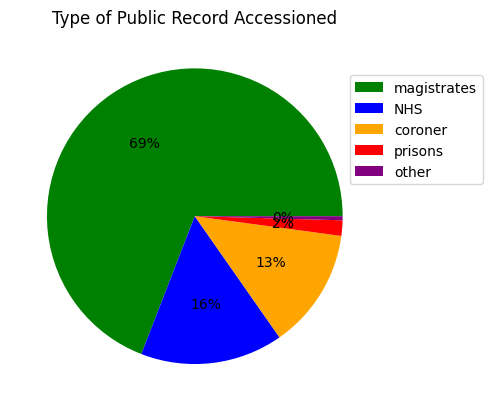

In [27]:
colors= ['green', 'blue', 'orange', 'red', 'purple']
type_prs.plot(kind='pie', y='Total linear meter accessioned', autopct='%1.0f%%', colors=colors, labeldistance=None, ylabel='', title='Type of Public Record Accessioned')
plt.legend(bbox_to_anchor=(0.9,0.9),);

In [28]:
df.groupby('Type Public Record').agg(
    {
        # each key in this dict specifies
        # a given column
        'Total Payment':[
            # the list contains aggregation functions
            # to be applied to this column
            'count',
            'mean',
            'min',
            'max',
            'std',
            'var'
        ]
    }
)

Total Payment                                               \
                           count         mean    min        max           std   
Type Public Record                                                              
NHS                          431  2217.117332   0.00  186995.10  10843.827288   
coroner                      234  3544.429487   6.75   54232.08   6703.122003   
magistrates                  462  7874.953853   5.31  186995.10  20380.548069   
other                         24  1124.685833  11.55    9349.76   2007.283188   
prisons                       47  2814.851702   0.00  110690.52  16087.770902   

                                  
                             var  
Type Public Record                
NHS                 1.175886e+08  
coroner             4.493184e+07  
magistrates         4.153667e+08  
other               4.029186e+06  
prisons             2.588164e+08

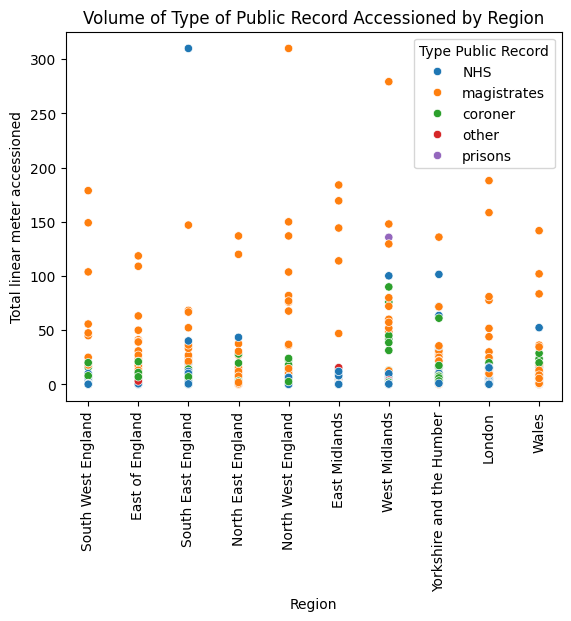

In [29]:
sns.scatterplot(data=df, x='Region', y='Total linear meter accessioned', hue='Type Public Record').set(title='Volume of Type of Public Record Accessioned by Region')
plt.xticks(rotation=90);

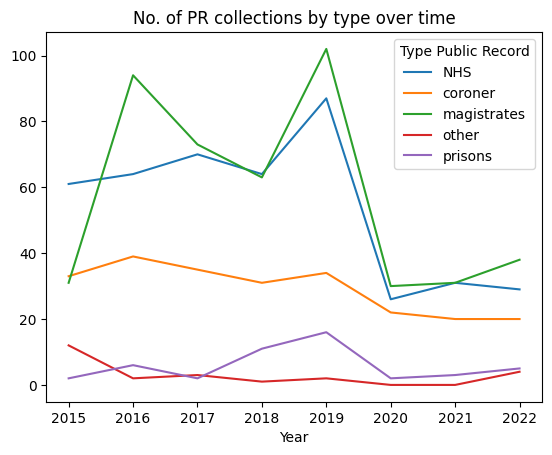

In [30]:
(df.groupby(['Year','Type Public Record' ])['Type Public Record'].count().unstack('Type Public Record', fill_value=0).plot(title='No. of PR collections by type over time'))
plt.show()


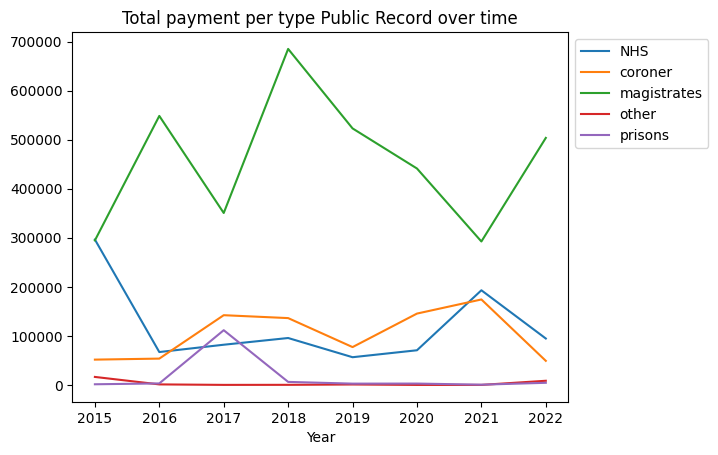

In [31]:
(df.groupby(['Year','Type Public Record' ])['Total Payment'].sum().unstack('Type Public Record', fill_value=0).plot(title='Total payment per type Public Record over time'))
plt.legend(bbox_to_anchor=(1,1))
plt.show()


In [32]:
x = df['Archon Code'].unique()
x.sort()
x

array([   1,    2,    4,    5,    8,   10,   11,   17,   20,   21,   23,
         24,   25,   26,   27,   28,   31,   32,   37,   40,   41,   42,
         43,   44,   45,   46,   47,   48,   49,   51,   55,   56,   57,
         74,   81,  124,  126,  127,  131,  132,  135,  138,  139,  140,
        143,  144,  145,  146,  149,  153,  154,  155,  157,  160,  166,
        168,  169,  173,  174,  175,  176,  177,  179,  182,  183,  187,
        189,  190,  191,  196,  197,  198,  199,  201,  202,  203,  205,
        206,  208,  209,  211,  212,  214,  216,  218,  219,  220,  221,
        757,  758,  821, 1076, 1189, 1831, 1857, 2008])

In [33]:
r_list = df['RepositoryName'].unique()
r_list
# list of archives obtaining NB funding

array(['Bath Record Office', 'Bristol Archives',
       'Bedfordshire Archives & Records Service',
       'Berkshire Record Office', 'Cambridgeshire Archives',
       'Teesside Archives', 'Cumbria Archive Centre, Carlisle',
       'Derbyshire Record Office',
       'Devon Archives and Local Studies Service (South West Heritage Trust)',
       'Plymouth and West Devon Record Office', 'Dorset History Centre',
       'Durham County Record Office', 'Gloucestershire Archives',
       'Hampshire Archives and Local Studies',
       'Southampton Archives Office',
       'Worcestershire Archive and Archaeology Service',
       'Hertfordshire Archives and Local Studies',
       'North East Lincolnshire Archives',
       'Kent History and Library Centre',
       'Leicestershire, Leicester and Rutland, Record Office for',
       'London Metropolitan Archives: City of London',
       'Greater Manchester County Record Office (with Manchester Archives)',
       'Wigan Archives and Local Studies', 'Wi

In [34]:
no_collections = df['RepositoryName'].value_counts().reset_index().rename(columns={"index": "Repository Name", 'RepositoryName': "no. of collections"})
no_collections
# total number of PR collections accessioned per archive

,Repository Name,no. of collections
0,Durham County Record Office,201
1,London Metropolitan Archives: City of London,73
2,Berkshire Record Office,61
3,East Sussex Record Office,45
4,"West Yorkshire Archive Service, Wakefield",42
...,...,...
91,St Helens Archive Service,1
92,Manchester University: Methodist Archives and ...,1
93,Carmarthenshire Archive Service,1
94,Staffordshire and Stoke-on-Trent Archive Servi...,1


In [35]:
type_by_archive = df.groupby(['RepositoryName','Type Public Record' ], as_index=False)['Total Payment'].sum()
type_by_archive.head(20)
# type of PR accessioned and total payement received per archive across all years

,RepositoryName,Type Public Record,Total Payment
0,ARK: Archive Resource for Knowsley,magistrates,10180.24
1,Archifau Ynys Mon / Anglesey Archives,magistrates,22589.65
2,Archives and Cornish Studies Service,NHS,1574.33
3,Barnsley Archive and Local Studies Department,NHS,713.58
4,Barnsley Archive and Local Studies Department,magistrates,59558.42
5,Bath Record Office,NHS,2700.84
6,Bath Record Office,magistrates,30384.45
7,Bedfordshire Archives & Records Service,NHS,4533.14
8,Bedfordshire Archives & Records Service,coroner,12485.12
9,Bedfordshire Archives & Records Service,magistrates,82475.00


In [36]:
num = df['Archon Code'].nunique()
num

96

In [37]:
name = df['RepositoryName'].nunique()
name

96

In [38]:
years = df.groupby('Year')['Archon Code'].nunique().sort_values(ascending=False)
years = years.to_frame('count').reset_index()
years
# no. of archives receiving NB funding per year

,Year,count
0,2016,60
1,2019,54
2,2017,49
3,2015,47
4,2018,47
5,2022,42
6,2021,38
7,2020,37


In [39]:
pods_per_yr = df.groupby('Year')['RepositoryName'].unique().to_frame()
pods_per_yr.transpose()

Year,2015,2016,2017,2018,2019,2020,2021,2022
RepositoryName,"[Bristol Archives, Bedfordshire Archives & Rec...","[Bristol Archives, Bedfordshire Archives & Rec...","[Bristol Archives, Bedfordshire Archives & Rec...","[Bedfordshire Archives & Records Service, Berk...","[Bristol Archives, Bedfordshire Archives & Rec...","[Bedfordshire Archives & Records Service, Berk...","[Bristol Archives, Bedfordshire Archives & Rec...","[Bath Record Office, Bristol Archives, Bedford..."


In [40]:
pod_list = df2[(df2['PROApproval']=='yes') & (df2['type']=='Local')]
pod_list

,Archon Code,RepositoryName,type,PitchID,pitchName,PROApproval
0,1,Bath Record Office,Local,25298.0,South West England,yes
1,2,Bristol Archives,Local,25298.0,South West England,yes
3,4,Bedfordshire Archives & Records Service,Local,25277.0,East of England,yes
4,5,Berkshire Record Office,Local,25297.0,South East England,yes
7,8,Centre for Buckinghamshire Studies,Local,25297.0,South East England,yes
...,...,...,...,...,...,...
1107,1204,Medway Archives and Local Studies Centre,Local,25297.0,South East England,yes
1694,1831,"Cumbria Archive and Local Studies Centre, Whit...",Local,25286.0,North West England,yes
1713,1857,Staffordshire and Stoke-on-Trent Archive Servi...,Local,25302.0,West Midlands,yes
1852,2008,Conwy Archive Service,Local,25301.0,Wales,yes


In [41]:
pods_not_part = pod_list[~pod_list['Archon Code'].isin(df['Archon Code'])]
pods_not_part

,Archon Code,RepositoryName,type,PitchID,pitchName,PROApproval
35,38,"Essex Record Office, Colchester and North-East...",Local,NaN,NaN,yes
48,54,Canterbury Cathedral Archives and Library,Local,25297.0,South East England,yes
75,83,Greenwich Heritage Centre,Local,25282.0,London,yes
76,84,Hackney Archives,Local,25282.0,London,yes
81,89,Lewisham Local History and Archives Centre,Local,25282.0,London,yes
86,94,City of Westminster Archives Centre,Local,25282.0,London,yes
116,125,Bolton Archives and Local Studies Service,Local,25286.0,North West England,yes
121,130,Stockport Archive Service,Local,25286.0,North West England,yes
137,148,Walsall Archives,Local,25302.0,West Midlands,yes
158,171,Staffordshire and Stoke-on-Trent Archive Servi...,Local,NaN,NaN,yes


In [42]:
tpr = df.groupby(['Type Public Record', 'Region'], as_index=False)['Total linear meter accessioned'].sum()
tpr['sum'] = tpr.groupby('Type Public Record')['Total linear meter accessioned'].rank(method='first', ascending=False)
# ordering by the sum of total lm accessioned for each region
tpr = tpr.sort_values(by=['Type Public Record', 'sum'])
tpr = tpr.drop(columns='sum')
tpr
# total lm accessioned by type PR per region

,Type Public Record,Region,Total linear meter accessioned
5,NHS,South East England,561.738400
9,NHS,Yorkshire and the Humber,380.680000
8,NHS,West Midlands,184.681000
7,NHS,Wales,121.128000
2,NHS,London,94.460000
0,NHS,East Midlands,75.334000
6,NHS,South West England,74.151880
3,NHS,North East England,68.271460
4,NHS,North West England,46.522200
1,NHS,East of England,39.505592


In [43]:
ytpr = df.groupby(['Year', 'RepositoryName', 'Type Public Record'], as_index=False)['Total Payment'].sum()
ytpr['sum'] = ytpr.groupby('Year')['Total Payment'].rank(method='first', ascending=False)
# ordering by the sum of total lm accessioned for each region
ytpr = ytpr.sort_values(by=['Year', 'RepositoryName', 'sum'])
ytpr = ytpr.drop(columns='sum')
ytpr.head(50)
# type PR per archive per year

,Year,RepositoryName,Type Public Record,Total Payment
0,2015,ARK: Archive Resource for Knowsley,magistrates,8837.03
1,2015,Barnsley Archive and Local Studies Department,magistrates,199.06
2,2015,Bedfordshire Archives & Records Service,coroner,6635.31
4,2015,Berkshire Record Office,coroner,8704.31
3,2015,Berkshire Record Office,NHS,6641.35
5,2015,Berwick-upon-Tweed Record Office,magistrates,1103.27
6,2015,"Birmingham: Archives, Heritage and Photography...",NHS,8463.04
7,2015,"Birmingham: Archives, Heritage and Photography...",other,2352.52
8,2015,Bristol Archives,other,225.60
10,2015,Cambridgeshire Archives,coroner,1025.46


In [44]:
sum_pay = df['Total Payment'].sum()
sum_pay
#this should be 5280000 (or 660000 * 8)
#there is a discrepancy of 302493

5582493.24

In [45]:
total_pay = df.groupby(['Archon Code','RepositoryName'])['Total Payment'].sum()
total_pay = total_pay.to_frame('total payment all yrs').reset_index().sort_values(by='total payment all yrs', ascending=False)
total_pay['percentage of total paid to date'] = total_pay["total payment all yrs"] / sum_pay * 100
total_pay
# total payment received by each archive across all years

,Archon Code,RepositoryName,total payment all yrs,percentage of total paid to date
44,143,"Birmingham: Archives, Heritage and Photography...",370217.94,6.631767
33,74,London Metropolitan Archives: City of London,365126.59,6.540565
82,214,Glamorgan Archives,273533.09,4.899837
52,157,Nottinghamshire Archives,232610.91,4.166793
73,201,"West Yorkshire Archive Service, Wakefield",216407.61,3.876540
...,...,...,...,...
37,127,Manchester Archives and Local Studies,274.38,0.004915
94,1857,Staffordshire and Stoke-on-Trent Archive Servi...,214.07,0.003835
80,211,Carmarthenshire Archive Service,71.36,0.001278
61,177,Kingston History Centre,31.87,0.000571


In [46]:
with pd.ExcelWriter("PR_NB_analysis_2015_22Edit.xlsx") as writer:

    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    all_region.to_excel(writer, sheet_name="archives per region", index=False)
    type_prs.to_excel(writer, sheet_name="type PR by lm")
    no_collections.to_excel(writer, sheet_name="no. collections per archive", index=False)
    type_by_archive.to_excel(writer, sheet_name="type PR per archive", index=False)
    years.to_excel(writer, sheet_name="archives per year", index=False)
    tpr.to_excel(writer, sheet_name="PRs per region", index=False)
    ytpr.to_excel(writer, sheet_name="type PR per archive per yr", index=False)
    total_pay.to_excel(writer, sheet_name="total payments", index=False)
    pods_not_part.to_excel(writer, sheet_name="non participants", index=False)